In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path =  r'C:\Users\Anshika Chauhan\Downloads\Walmart Sales.xlsx'
df = pd.read_excel(file_path)
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7   1/5/2019  13:08:00   
1  Electronic accessories       15.28         5   3/8/2019  10:29:00   
2      Home and lifestyle       46.33         7   3/3/2019  13:23:00   
3       Health and beauty       58.22         8  1/27/2019  20:33:00   
4       Sports and travel       86.31         7   2/8/2019  10:37:00   

       Payment  Rating  
0      Ewallet     9.1  
1         Cash     9.6  
2  Credit card     7.4  
3      Ewallet     8.4  
4      Ewallet     5.3  


### Q-1(A) Analyze the performance of sales and revenue at the city and branch level 

In [3]:
df['Revenue'] = df['Quantity'] * df['Unit price']

In [4]:
city_performance = df.groupby('City').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

In [5]:
branch_performance = df.groupby('Branch').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

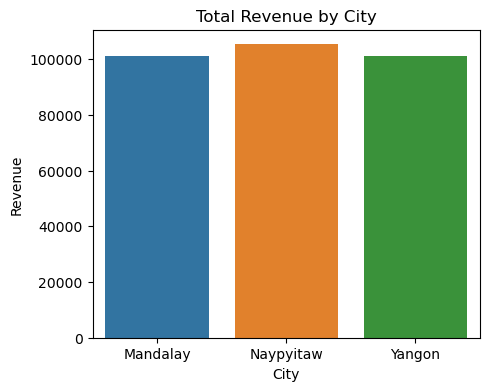

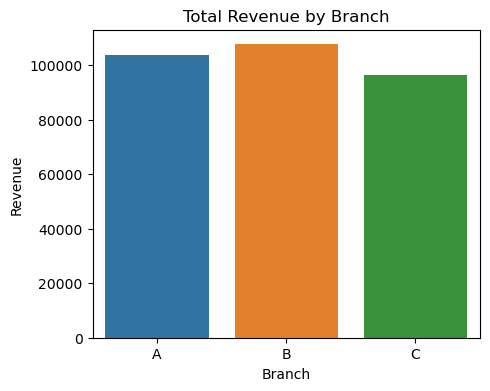

In [6]:
plt.figure(figsize=(5, 4))

sns.barplot(x='City', y='Revenue', data=city_performance)
plt.title('Total Revenue by City')

plt.figure(figsize=(5, 4))
sns.barplot(x='Branch', y='Revenue', data=branch_performance)
plt.title('Total Revenue by Branch')

plt.show()

### Q.-1(B) What is the average price of an item sold at each branch of the city

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [8]:
average_price_data = df.groupby(['City', 'Branch', 'Product line']).agg({'Revenue': 'mean'}).reset_index()

In [9]:
pivot_table = average_price_data.pivot_table(index=['City', 'Branch'], columns='Product line', values='Revenue', fill_value=0)

In [10]:
print(pivot_table)

Product line      Electronic accessories  Fashion accessories  \
City      Branch                                                
Mandalay  A                   222.063000           262.316000   
          B                   350.660909           206.920000   
          C                   314.128462           281.540526   
Naypyitaw A                   390.999412           257.241429   
          B                   324.105238           383.280000   
          C                   271.322941           296.630500   
Yangon    A                   293.357059           202.395000   
          B                   335.615200           337.868333   
          C                   225.967778           349.453158   

Product line      Food and beverages  Health and beauty  Home and lifestyle  \
City      Branch                                                              
Mandalay  A               294.365556         391.762857          352.180500   
          B               281.507778         36

### Q.1 (C) Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


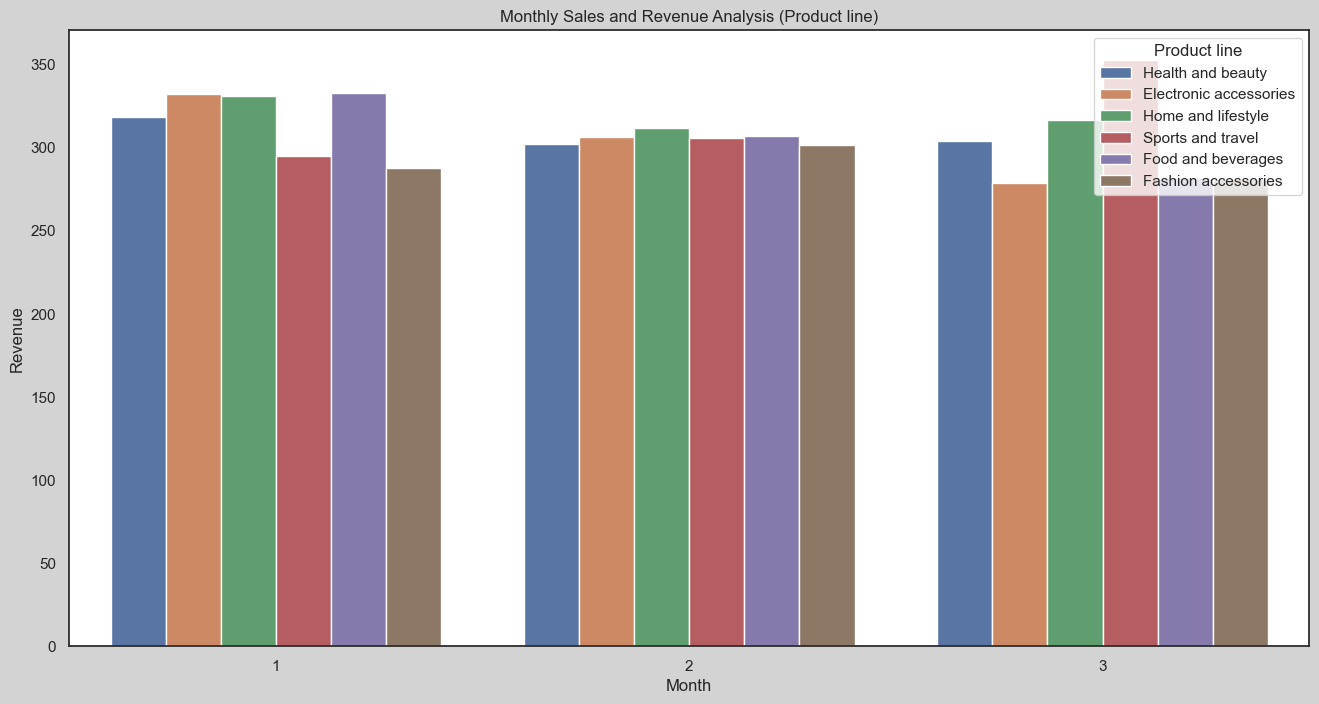

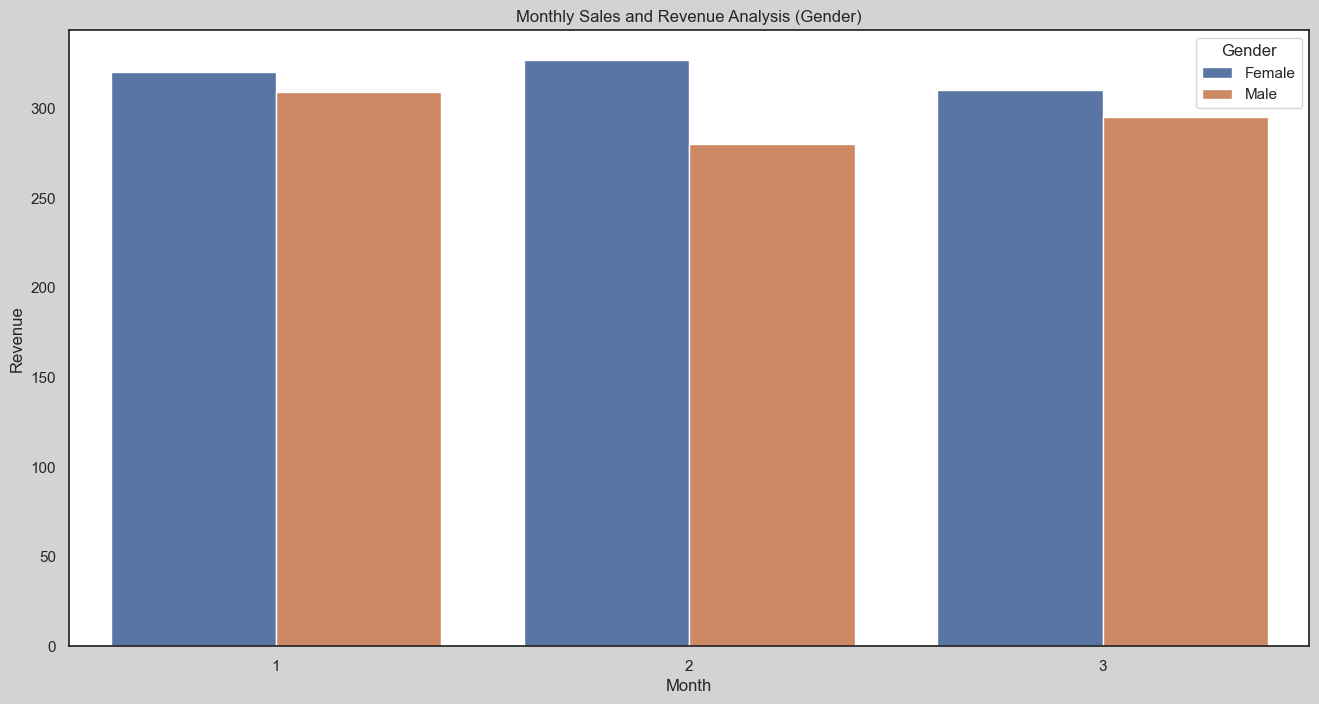

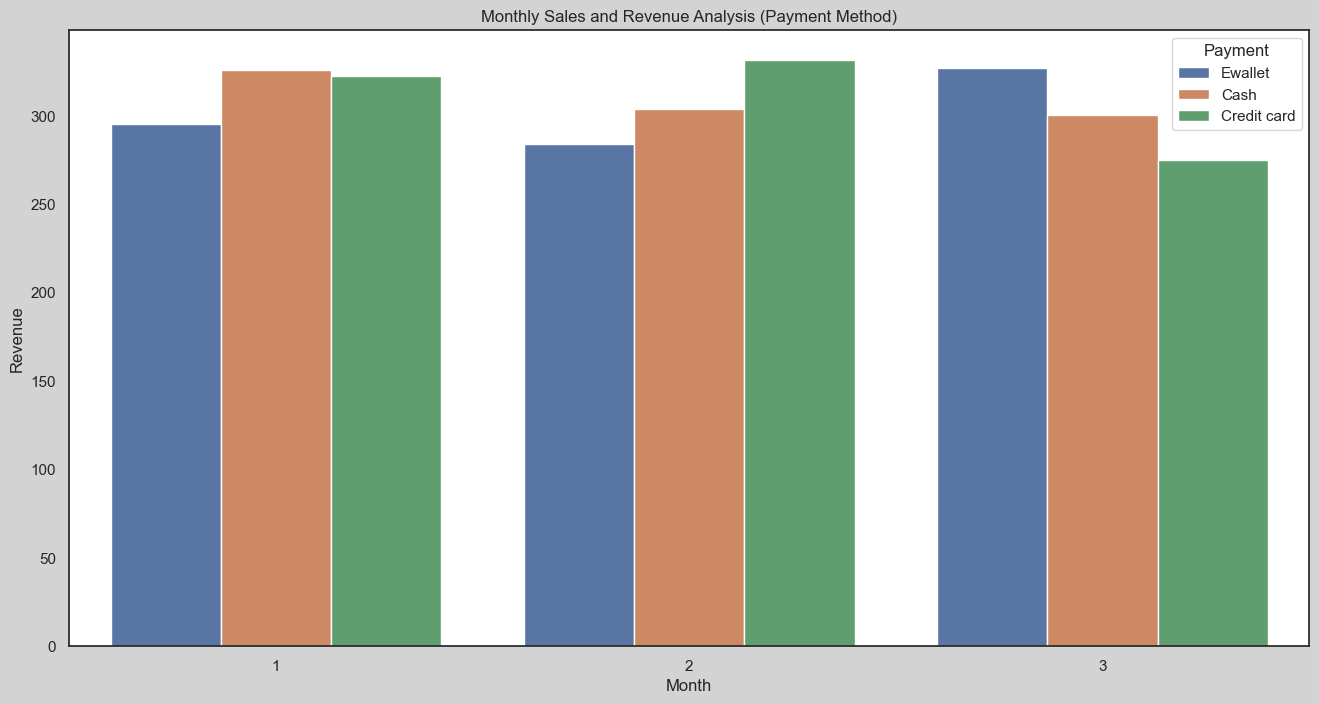

In [37]:
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df_previous_months = df[df['Month'] != 4]

# Analyze performance Month over Month
plt.figure(figsize=(16, 8))
sns.set(style = "white")
fig = plt.gcf()
fig.set_facecolor("lightgrey")
sns.barplot(x='Month', y='Revenue', hue='Product line', data=df_previous_months, ci=None)
plt.title('Monthly Sales and Revenue Analysis (Product line)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(16, 8))
sns.set(style = "white")
fig = plt.gcf()
fig.set_facecolor("lightgrey")
bar_width = 0.2
sns.barplot(x='Month', y='Revenue', hue='Gender', data=df_previous_months, ci=None)
plt.title('Monthly Sales and Revenue Analysis (Gender)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(16, 8))
sns.set(style = "white")
fig = plt.gcf()
fig.set_facecolor("lightgrey")
sns.barplot(x='Month', y='Revenue', hue='Payment', data=df_previous_months, ci=None)
plt.title('Monthly Sales and Revenue Analysis (Payment Method)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## Inference

* We need to focus on product which is directly or indirectly related to male segment, we are able to see in bar plot chart there is slightly decrese the sales value in product(male segment).
* we need to focus on Fashion assessories, electronic assessories, we are slightly decresing month on month
* also focus on advertise and promote the credit card sales

### Q.2 Explore the features and user experience of the Jar app. Identify two aspects that you think could be significantly improved and explain your reasoning behind each suggestion 

**Transparent Investment Information:**

**Issue:** Users may be hesitant to invest without clear information about where their money is being invested and the expected return on investment.

**Suggestion:** Enhance the app's transparency by providing detailed information about the investment process. Specify how and where users' funds are invested, the associated risks, and the potential ROI. Consider adding an 'Investment Details' section within the app that offers clear insights into the investment strategy, performance, and any associated costs or fees.

**Educational Resources:**

**Issue:** Users may feel more confident in their financial decisions if they have a better understanding of investing, digital gold, and the broader financial landscape.

**Suggestion:** Integrate educational resources within the app to inform users about investment principles, the benefits of investing in digital gold, and how different financial products work. This could include articles, videos, or interactive content that helps users make informed decisions about their savings and investments.
Implementing these suggestions could help build trust with users, enhance their financial literacy, and empower them to make informed decisions about their savings and investments on the Jar platform. Additionally, seeking user feedback through surveys or reviews could provide valuable insights into specific areas for improvement and user preferences.

* implementing the said concerned could help in build the trust with the users, inhance their finanlical knowledge and empower them to take the deciosn towards inverstment.
* Also I want to add retirement plan into the features, because According to the Periodic Labour Force Survey (PLFS) 2020-21, the government sector employed 10.2% of the total workforce in India, while the private sector employed 88.5%. So, maximum people look for retirement word//

### Q.3 The Jar app has an engagement feature called 'Spin to Win'.
* Right now, if 100 people come to the app each day, only 23 of them try out this spinning game. But, we know that people who spin are more likely to retain on the app and do transactions.
* Now, we want to get more people to play the game. So, the question is, how can we make sure that at least 50 people out of every 100 who visit the app each day will play 'Spin to Win'? What can we do to get more people interested in spinning the wheel?


**We can impletement and categorised into strategy wise.**

**1. Limited-Time Specials:**

* Provide time limit for the every day and Introduce limited-time promotions or special events where users have a chance to win exclusive prizes or bonus rewards by participating in the 'Spin to Win' game.
* This will create a sense of urgency to encourage users to try the game immediately.

**2. Personalized Offers:**

* This is available in your application but with no clarification that How we are calculation or discounting with with your appliying in. 
* Tailor the rewards based on the user's preferences, transaction history, or engagement patterns.

**3. Push Notifications:**

* Send push notifications to users, notifying them about the availability of the 'Spin to Win' feature and any ongoing special promotions. Ensure that notifications are engaging and highlight the potential rewards.

**4. Social Sharing and Challenges:**

* Introduce social elements by allowing users to share their 'Spin to Win' results on social media. Consider implementing challenges or competitions where users can challenge their friends to participate.

**5. Frequency and Visibility:**

* Here, We can add purchase more round or spin availability features for 'Spin to Win'. Increase the frequency of the 'Spin to Win' feature, making it available multiple times a day or week to keep users engaged.

**6. Feedback and Improvement:**

* Collect feedback from users who have participated in the 'Spin to Win' game and use the insights to make continuous improvements. Address any concerns or suggestions to enhance the overall experience.